In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.datasets import mnist
from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

<ipython-input-8-fd71251b1624>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


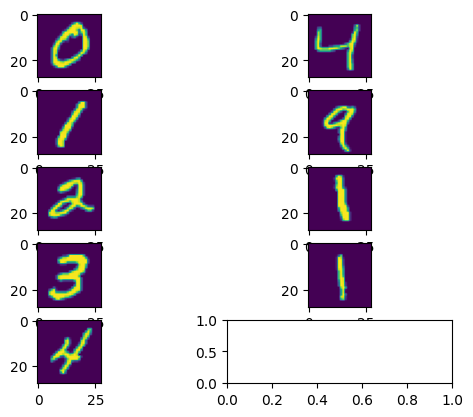

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5, 2, i+1)

In [9]:
x_train /= 255
x_test /= 255
model = None
batch_size=64
epoch = 2
num = 10
def cnn_model(optimizer):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])
  model.summary()
  return model


optimizer =  Adadelta
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 32)          0         
                                                                 
 flatten_5 (Flatten)         (N

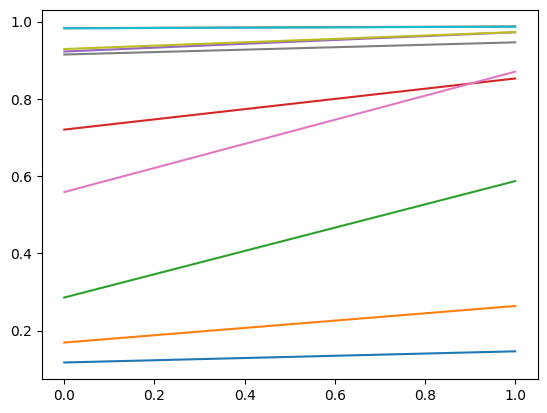

In [11]:
res = []
opts = ['Adadelta', 'Adagrad', 'Adam', 'SGD', 'RMSprop']
for optimizer in opts:
  print("")
  print("optimizer = ",optimizer)
  final_model = cnn_model(optimizer)
  plot_model(final_model, to_file = "mnist model"+".jpg", show_shapes = True)
  hist = final_model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(x_test, y_test), verbose = 1)
  y1 = hist.history['accuracy']
  y2 = hist.history['val_accuracy']
  plt.plot(y1)
  plt.plot(y2)
  res.append([optimizer, np.max(y1), np.max(y2)])

In [12]:
print("Table of result: ")
print("optimizer".ljust(15), "Training acc".ljust(20), "validation acc".ljust(25))
for row in res:
  print(row[0].ljust(15), str(row[1]).ljust(20), str(row[2]).ljust(25))


Table of result: 
optimizer       Training acc         validation acc           
Adadelta        0.1462833285331726   0.2635999917984009       
Adagrad         0.5870333313941956   0.8526999950408936       
Adam            0.97243332862854     0.9873999953269958       
SGD             0.8704166412353516   0.9463000297546387       
RMSprop         0.9728500247001648   0.9868000149726868       
